<a href="https://colab.research.google.com/github/sofiaborgato/Bioinformatic_project/blob/main/Alignment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global alignments 
Global alignments, which attempt to align every residue in every sequence, are most useful when the sequences in the query set are similar and of roughly equal size. (This does not mean global alignments cannot start and/or end in gaps.) A general global alignment technique is the Needleman–Wunsch algorithm which is based on dynamic programming
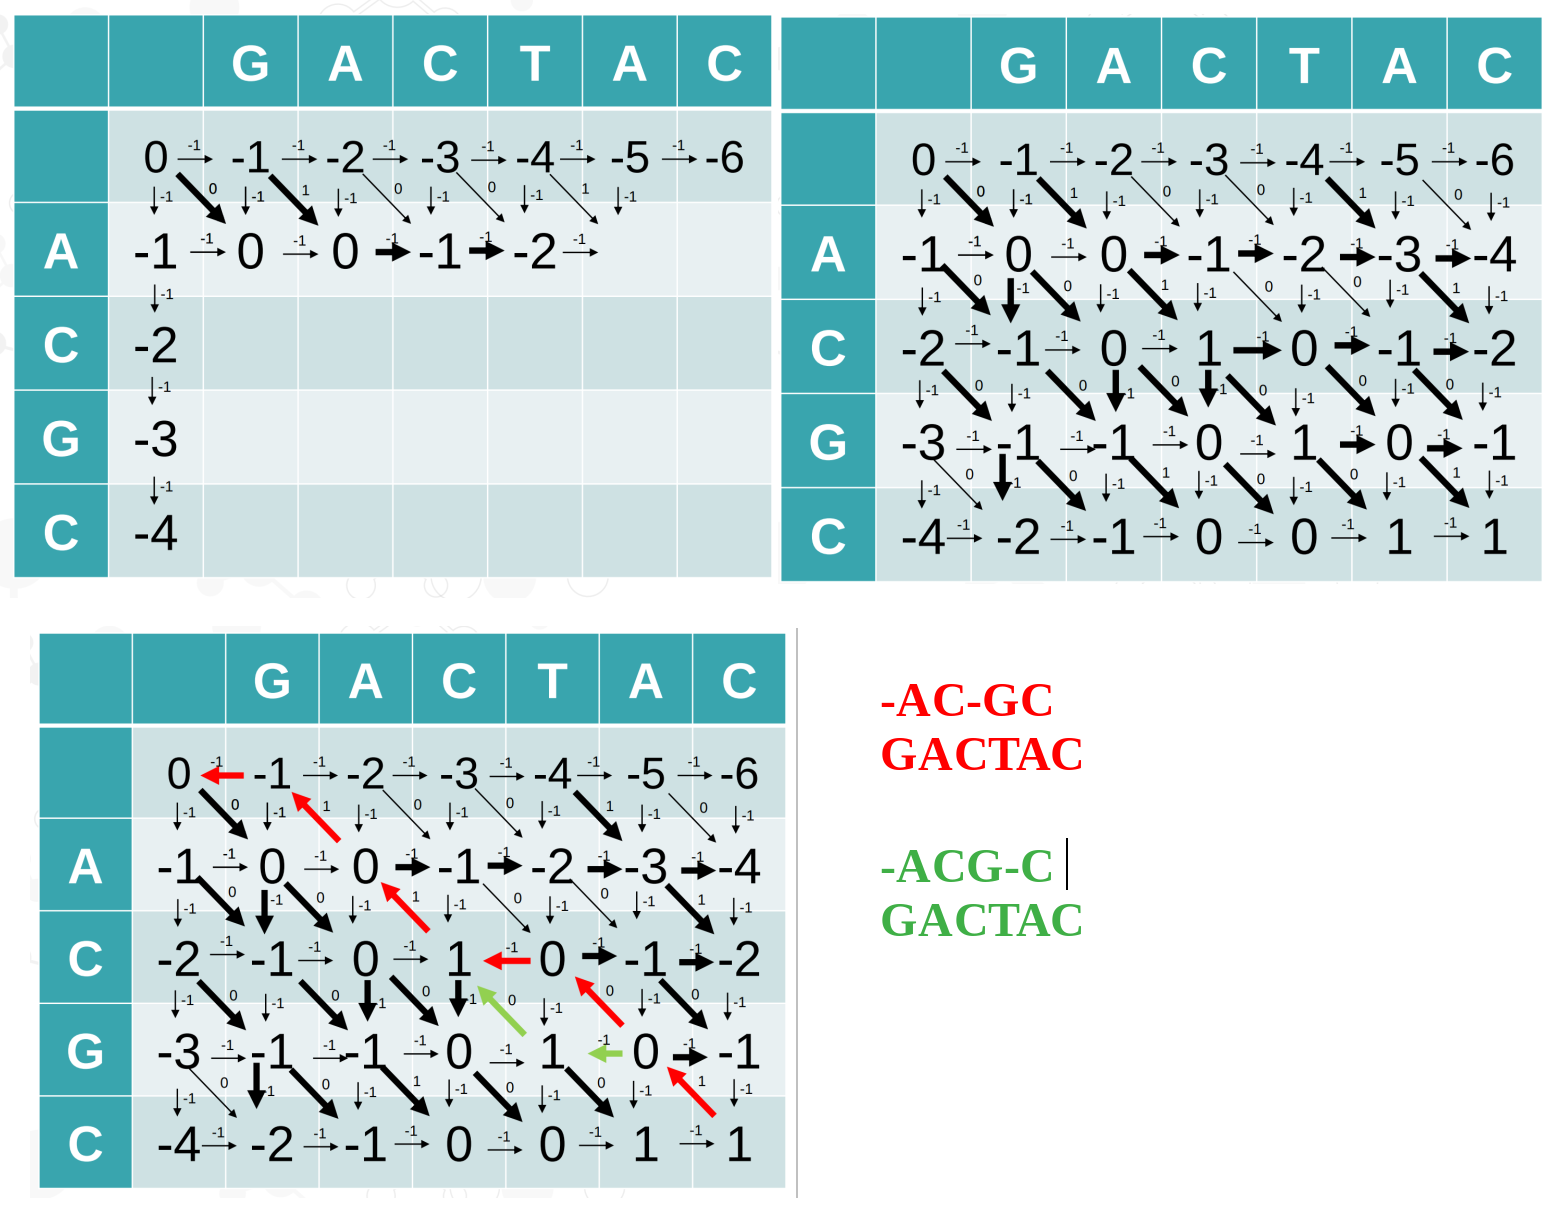

Suddivisione del virus in geni:



*   ORF1ab      : 266..21555
*   S (Spike)   : 21563..25384
*   ORF3A       : 25393..26220
*   E           : 26245..26472
*   M           : 26523..27191
*   ORF6        : 27202..27387
*   ORF7a       : 27394..27759
*   ORF7b       : 27760..27887
*   ORF8        : 27894..28259
*   N           : 28274..29533
*   ORF10       : 29558..29674


##Preparazione dei dati e delle funzioni

In [ ]:
!git clone https://github.com/sofiaborgato/Bioinformatic_project.git

Cloning into 'Bioinformatic_project'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [ ]:
import tarfile
import os
# open file
file = tarfile.open('./Bioinformatic_project/data.tar.xz') 
# extracting file
file.extractall('./Bioinformatic_project')
  
file.close()


In [ ]:
cd Bioinformatic_project

/content/Bioinformatic_project


In [ ]:
!pip3 install Bio

     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 2.3MB 7.4MB/s 


Datasets creation

In [ ]:
# Import pairwise2 module
from Bio import pairwise2


# Import format_alignment method
from Bio.pairwise2 import format_alignment
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import string
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
total = pd.read_csv('data/total.csv')
us = pd.read_csv('data/us.csv')
en_1 = pd.read_csv('data/e_1.csv')
en_2 = pd.read_csv('data/e_2.csv')
bra = pd.read_csv('data/bra.csv')
ori = pd.read_csv('data/ori.csv')
afri = pd.read_csv('data/afri.csv')


In [ ]:
#Function to read and import a fasta file
def read(path):
    reads=[] #array of the reads to be returned
    bases = ['A','C','G','T']
    copy = True
    with open(path) as f:
        genome = ""
        for line in f:
            if line[0] != '>':
                row=line.replace('\n','')
                genome = genome + row

            #By setting the flag the next line will be appended to the array
            
            
    return genome

In [ ]:
ref=read('original_covid_genome.fasta')

In [ ]:
#Function to perform alignment between two strings X and Y

def align(X,Y, corr = 2, mis = -0.1, gap = -2, rgap = -0.2, span = 1000,step = 800,):
  span = span
  step = step
  low = int(span/2 - step/2)
  up = int(span/2 + step/2)
  corr = corr
  mis_pen = mis
  gap_pen = gap
  rgap_pen = rgap
  lenght = len(Y)
  first = True
  seq1 = ""
  seq2 = ""

  counter = 0
  while ((counter*step + span) < lenght):
    alignments = pairwise2.align.globalms( X[step*counter: step*counter + span],  Y[step*counter: step*counter + span],corr,mis_pen, gap_pen, rgap_pen)
    #print("Posizione = " + str(counter*step) + "\n")
    #for a in alignments[:2]:
    #  print(format_alignment(*a))
    if first:
      seq1 = seq1 + alignments[0][0][:up]
      seq2 = seq2 + alignments[0][1][:up]
      first = False
    else:
      seq1 = seq1 + alignments[0][0][low:up]
      seq2 = seq2 + alignments[0][1][low:up]
    counter = counter + 1
  alignments = pairwise2.align.globalms( X[step*counter: ],  Y[step*counter: ],corr,mis_pen, gap_pen, rgap_pen)
  seq1 = seq1 + alignments[0][0][low:]
  seq2 = seq2 + alignments[0][1][low:]

  seq_s = ""
  c = len(seq1)
  for i in range(c):
    if seq1[i] == seq2[i]:
      seq_s = seq_s + "|"
    if seq1[i] == "-" or seq2[i] == "-":
      seq_s = seq_s + " "
    else:
      if seq1[i] != seq2[i]:
        seq_s = seq_s + "."
  #print_alignment(seq1,seq2,seq_s)
  return seq1,seq2,seq_s


In [ ]:
def print_alignment(seq1,seq2,seq_s):
  print(seq1)
  print(seq_s)
  print(seq2)

In [ ]:
#Function to evaluate the number of mismatches and gaps in each gene


#ORF1ab : 266..21555
#S (Spike) : 21563..25384
#ORF3A : 25393..26220
#E : 26245..26472
#M : 26523..27191
#ORF6 : 27202..27387
#ORF7a : 27394..27759
#ORF7b : 27760..27887
#ORF8 : 27894..28259
#N : 28274..29533
#ORF10 : 29558..29674
def process_alignment(seq2,seq_s):
  ORF1ab = [0,0]
  S = [0,0]
  ORF3a = [0,0]
  E  = [0,0]
  M = [0,0]
  ORF6  = [0,0]
  ORF7a = [0,0]
  ORF7b = [0,0]
  ORF8 = [0,0]
  N  = [0,0]
  ORF10 = [0,0]
  OTHER = [0,0]
  for i, b in enumerate(seq_s):
    if seq2[i] != "X":
      if (b == "."):
        if i > 264 and i < 21555:
          ORF1ab[0] = ORF1ab[0] + 1
        elif i > 21561 and i < 25384:
          S[0] = S[0] + 1
        elif i > 25391 and i < 26220:
          ORF3a[0] = ORF3a[0] + 1
        elif i > 26243 and i < 26472:
          E[0] = E[0] + 1
        elif i > 26521 and i < 27191:
          M[0] = M[0] + 1
        elif i > 27200 and i < 27387:
          ORF6[0] = ORF6[0] + 1
        elif i > 27392 and i < 27759:
          ORF7a[0] = ORF7a[0] + 1
        elif i > 27758 and i < 27887:
          ORF7b[0] = ORF7b[0] + 1
        elif i > 27892 and i < 28259:
          ORF8[0] = ORF8[0] + 1
        elif i > 28272 and i < 29533:
          N[0] = N[0] + 1
        elif i > 29556 and i < 29674:
          ORF10[0] = ORF10[0] + 1
        elif i < 260 or i > 29700:
          ORF10[0] = ORF10[0]
        else:
          OTHER[0] = OTHER[0] + 1

      if (b == " "):
        if i > 264 and i < 21555:
          ORF1ab[1] = ORF1ab[1] + 1
        elif i > 21561 and i < 25384:
          S[1] = S[1] + 1
        elif i > 25391 and i < 26220:
          ORF3a[1] = ORF3a[1] + 1
        elif i > 26243 and i < 26472:
          E[1] = E[1] + 1
        elif i > 26521 and i < 27191:
          M[1] = M[1] + 1
        elif i > 27200 and i < 27387:
          ORF6[1] = ORF6[1] + 1
        elif i > 27392 and i < 27759:
          ORF7a[1] = ORF7a[1] + 1
        elif i > 27758 and i < 27887:
          ORF7b[1] = ORF7b[1] + 1
        elif i > 27892 and i < 28259:
          ORF8[1] = ORF8[1] + 1
        elif i > 28272 and i < 29533:
          N[1] = N[1] + 1
        elif i > 29556 and i < 29674:
          ORF10[1] = ORF10[1] + 1
        elif i < 260 or i > 29700:
          ORF10[1] = ORF10[1]
        else:
          OTHER[1] = OTHER[1] + 1
  list_genes_mis = [ORF1ab[0], S[0], ORF3a[0], E[0], M[0], ORF6[0], ORF7a[0], ORF7b[0], ORF8[0], N[0], ORF10[0], OTHER[0]]
  list_genes_gap = [ORF1ab[1], S[1], ORF3a[1], E[1], M[1], ORF6[1], ORF7a[1], ORF7b[1], ORF8[1], N[1], ORF10[1], OTHER[1]]
  out = list_genes_mis + list_genes_gap
  return out

##Creazione dei dataset di statistiche sull'allineamento

In [ ]:
# Define two sequences to be aligned
data = []
X = ref
for i in range(len(en_2)):
  if (i+1)%10 == 0:
    print(str((i+1)/10) + "%")
  Y = en_2.loc[i][0]
  seq1,seq2,seq_s = align(X,Y)
  row = process_alignment(seq2,seq_s)
  data.append(row)
data = np.array(data)
col = ["mis_ORF1ab", "mis_S", "mis_ORF3a", "mis_E", "mis_M", "mis_ORF6", "mis_ORF7a", "mis_ORF7b", "mis_ORF8", "mis_N", "mis_ORF10", "mis_OTHER", "gap_ORF1ab", "gap_S", "gap_ORF3a", "gap_E", "gap_M", "gap_ORF6", "gap_ORF7a", "gap_ORF7b", "gap_ORF8", "gap_N", "gap_ORF10", "gap_OTHER"]
en2_alignment = pd.DataFrame(data, columns = col)
en2_alignment.to_csv("en2_alignment.csv", index = False)

TGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAAC
29903
29903
--------------------------------CAACCAACTTTCGATCTC
29903
--------------------------------------------------
29903
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC
29903
-------------------------AACAAACCAACCAACTTTCGATCTC
29903
--------------------------------CAACCAACTTTCGATCTC
29903
--------------------------------CAACCAACTTTCGATCTC
29903
--------------------------------------------------
29903
--------------------------------------------------
29903
------------------------TAACAAACCAACCAACTTTCGATCTC
29903
--------------------------------------------------


In [ ]:
 #Function to print average number of mismatches and gaps with a barplot
 
 def print_statistics(data):
    stat_mis = np.mean(data[:,:12],0)
    stat_gap = np.mean(data[:,12:],0)
    print("MISMATCH: " + str(stat_mis))
    plt.barh(["ORF1ab", "S", "ORF3a", "E", "M", "ORF6", "ORF7a", "ORF7b", "ORF8", "N", "ORF10", "OTHER"],stat_mis)
    plt.show()
    print("GAP: " + str(stat_gap))
    plt.barh(["ORF1ab", "S", "ORF3a", "E", "M", "ORF6", "ORF7a", "ORF7b", "ORF8", "N", "ORF10", "OTHER"],stat_gap)

MISMATCH: [12.506  5.608  1.372  0.018  1.116  0.046  0.12   0.072  0.513  2.513
  0.034  1.755]


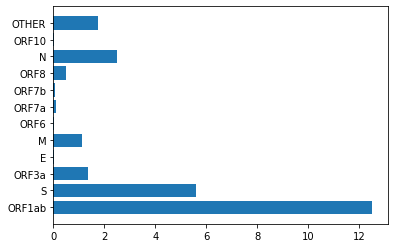

GAP: [1.80365e+02 3.48360e+01 6.94200e+00 0.00000e+00 5.26800e+00 6.19100e+00
 4.24000e-01 0.00000e+00 6.97500e+00 6.94200e+00 1.10000e-01 2.01200e+00]


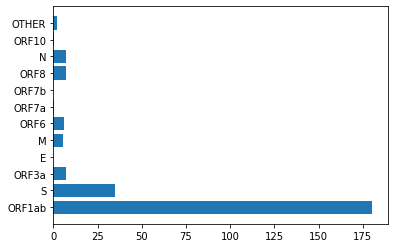

In [ ]:
print_statistics(data)

MISMATCH: [9.96 8.48 2.88 1.04 0.2  0.   0.08 0.08 1.28 1.16 0.   0.04]


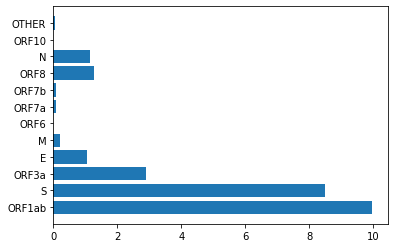

GAP: [9.   9.   0.   0.   0.   0.   0.   0.   0.   0.   1.4  1.08]


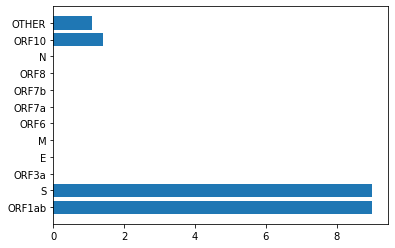

In [ ]:
print_statistics(data)

##Creazione del dataset allineato

In [ ]:
#ORF1ab : 266:21555
#S (Spike) : 21563:25384
#ORF3A : 25393:26220
#E : 26245:26472
#M : 26523:27191
#ORF6 : 27202:27387
#ORF7a : 27394:27759
#ORF7b : 27760:27887
#ORF8 : 27894:28259
#N : 28274:29533
#ORF10 : 29558:29674

# Define two sequences to be aligned
col = ["Full sequence", "ORF1ab", "S", "ORF3a", "E", "M", "ORF6", "ORF7a", "ORF7b", "ORF8", "N", "ORF10", "label"]
total_aligned = pd.DataFrame(columns = col)

X = ref
for i in range(len(total)):
  #if (i+1)%10 == 0:
  #  print(str((i+1)/10) + "%")
  Y = total['genome'][i]
  seq1,seq2,seq_s = align(X,Y)
  total_aligned = total_aligned.append({'Full sequence': seq2, 'ORF1ab': seq2[265:21555], 'S': seq2[21562:25384], 'ORF3a': seq2[25392:26220], 'E': seq2[26244:26472], 'M' : seq2[26522:27191], 'ORF6' : seq2[27201:27387], 'ORF7a' : seq2[27393:27759], 'ORF7b' : seq2[27755:27887], 'ORF8' : seq2[27893:28259], 'N' : seq2[28273:29533], 'ORF10' : seq2[29557:29674], 'label' : total['label'][i]}, ignore_index=True)


In [ ]:
total_aligned.to_csv("total_aligned.csv", index = False)

,Full sequence,ORF1ab,S,ORF3a,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF10,label
0,----------------------------------------------...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
1,----------------TTCCCAGGTAACAAACCAACCAACTTTCGA...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
2,-------------------------------------AACTTTCGA...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
3,----------------------------------------------...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
4,------GGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
5,----------------------------------------------...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGTTTCATCTCGTTGACTTTCAGGTTACTATAGCAGAGATATTAC...,ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTG...,ATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCT...,ATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCAT...,ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTA...,ATGGGCTATATAAACGTTTTCGCTTTTCCGTTTACGATATATAGTC...,1
6,--------------------------------------ACTTTCGA...,ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAAC...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTATTCAGTGTG...,ATGGATTTGTTTATGAGAATCTTCACAATTGGAACTGTAACTTTGA...,ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATA...,ATGGCAGATTCCAACGGTACTATTACCGTTGAAGAGCTTAAAAAGC...,ATGT

#Riduzione del dataset ai genomi con pochissime basi ignote

In [ ]:
X='X'
stat=[]
for el in total['genome']:
  num_X = el.count(X)
  stat.append(num_X)
s = np.array(stat)
total = total[s<100]


array([104, 247, 274, 223])

In [ ]:
len(total)

1095

In [ ]:
total = total.reset_index(drop=True)
total

,genome,label
0,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,1.0
1,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,1.0
2,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,1.0
3,TAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATC...,1.0
4,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,1.0
...,...,...
1090,AAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCT...,5.0
1091,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,5.0
1092,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,5.0
1093,AACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAAC...,5.0


In [ ]:
sum(total['label'] == 0)

101